In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
df = pd.read_csv('/content/bank-additional-full.csv', delimiter=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#EXPLORATORY DATA ANALYSIS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
numeric_cols = df.select_dtypes(['float', 'int']).columns
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


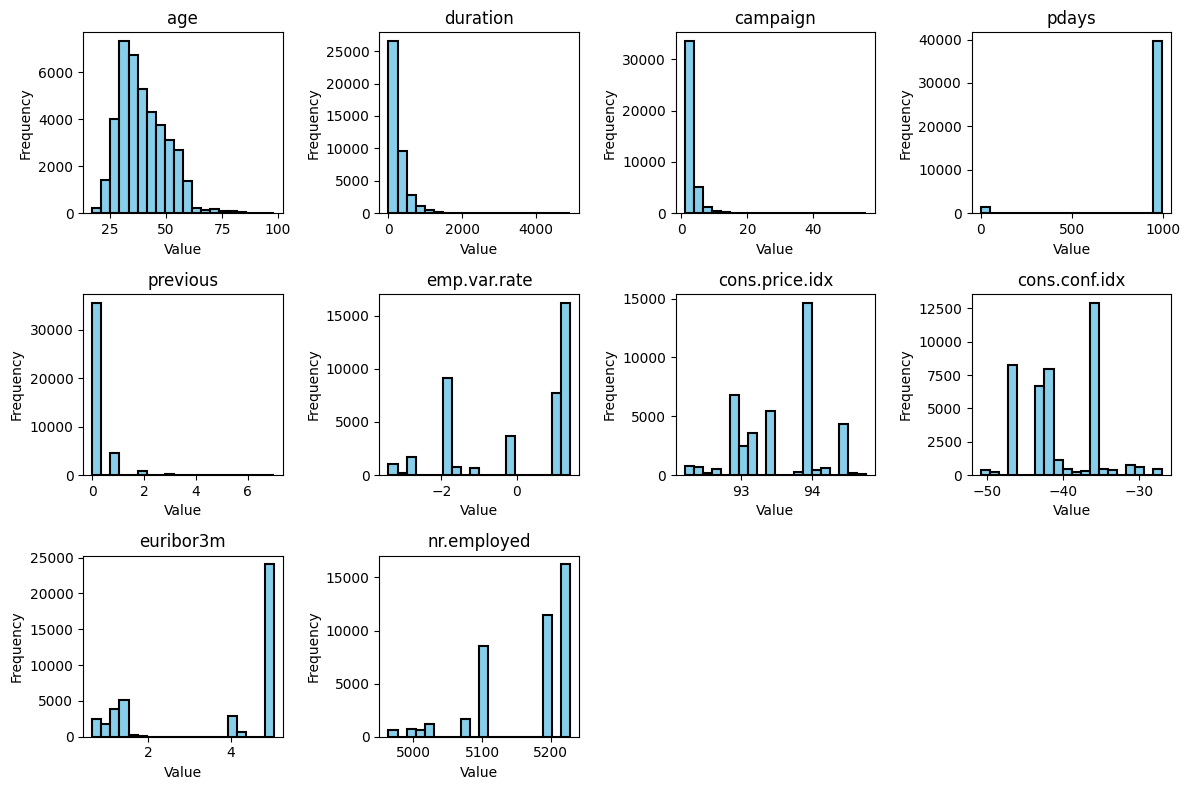

In [ ]:
plt.figure(figsize = (12,8))
for i,column in enumerate(numeric_cols,1):
  plt.subplot(3,4,i)
  '''Tham số bins=20 chỉ định rằng biểu đồ sẽ có 20 cột.
Các tham số color='skyblue', edgecolor='black' và linewidth=1.5 lần lượt chỉ định màu sắc, màu viền và độ dày đường viền của các cột trong biểu đồ.'''
  plt.hist(df[column],bins = 20, color ='skyblue', edgecolor='black', linewidth = 1.5)
  #Tham số bins=20 chỉ định rằng biểu đồ sẽ có 20 cột.
  plt.title(column)
  plt.xlabel('Value')
  plt.ylabel('Frequency')
plt.tight_layout() #tự động điều chỉnh khoảng cách giữa các vùng vẽ con trong hình vẽ để tránh chồng lấn.
plt.show()


In [ ]:
non_numeric_cols = df.select_dtypes('object').columns
df[non_numeric_cols].describe().T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


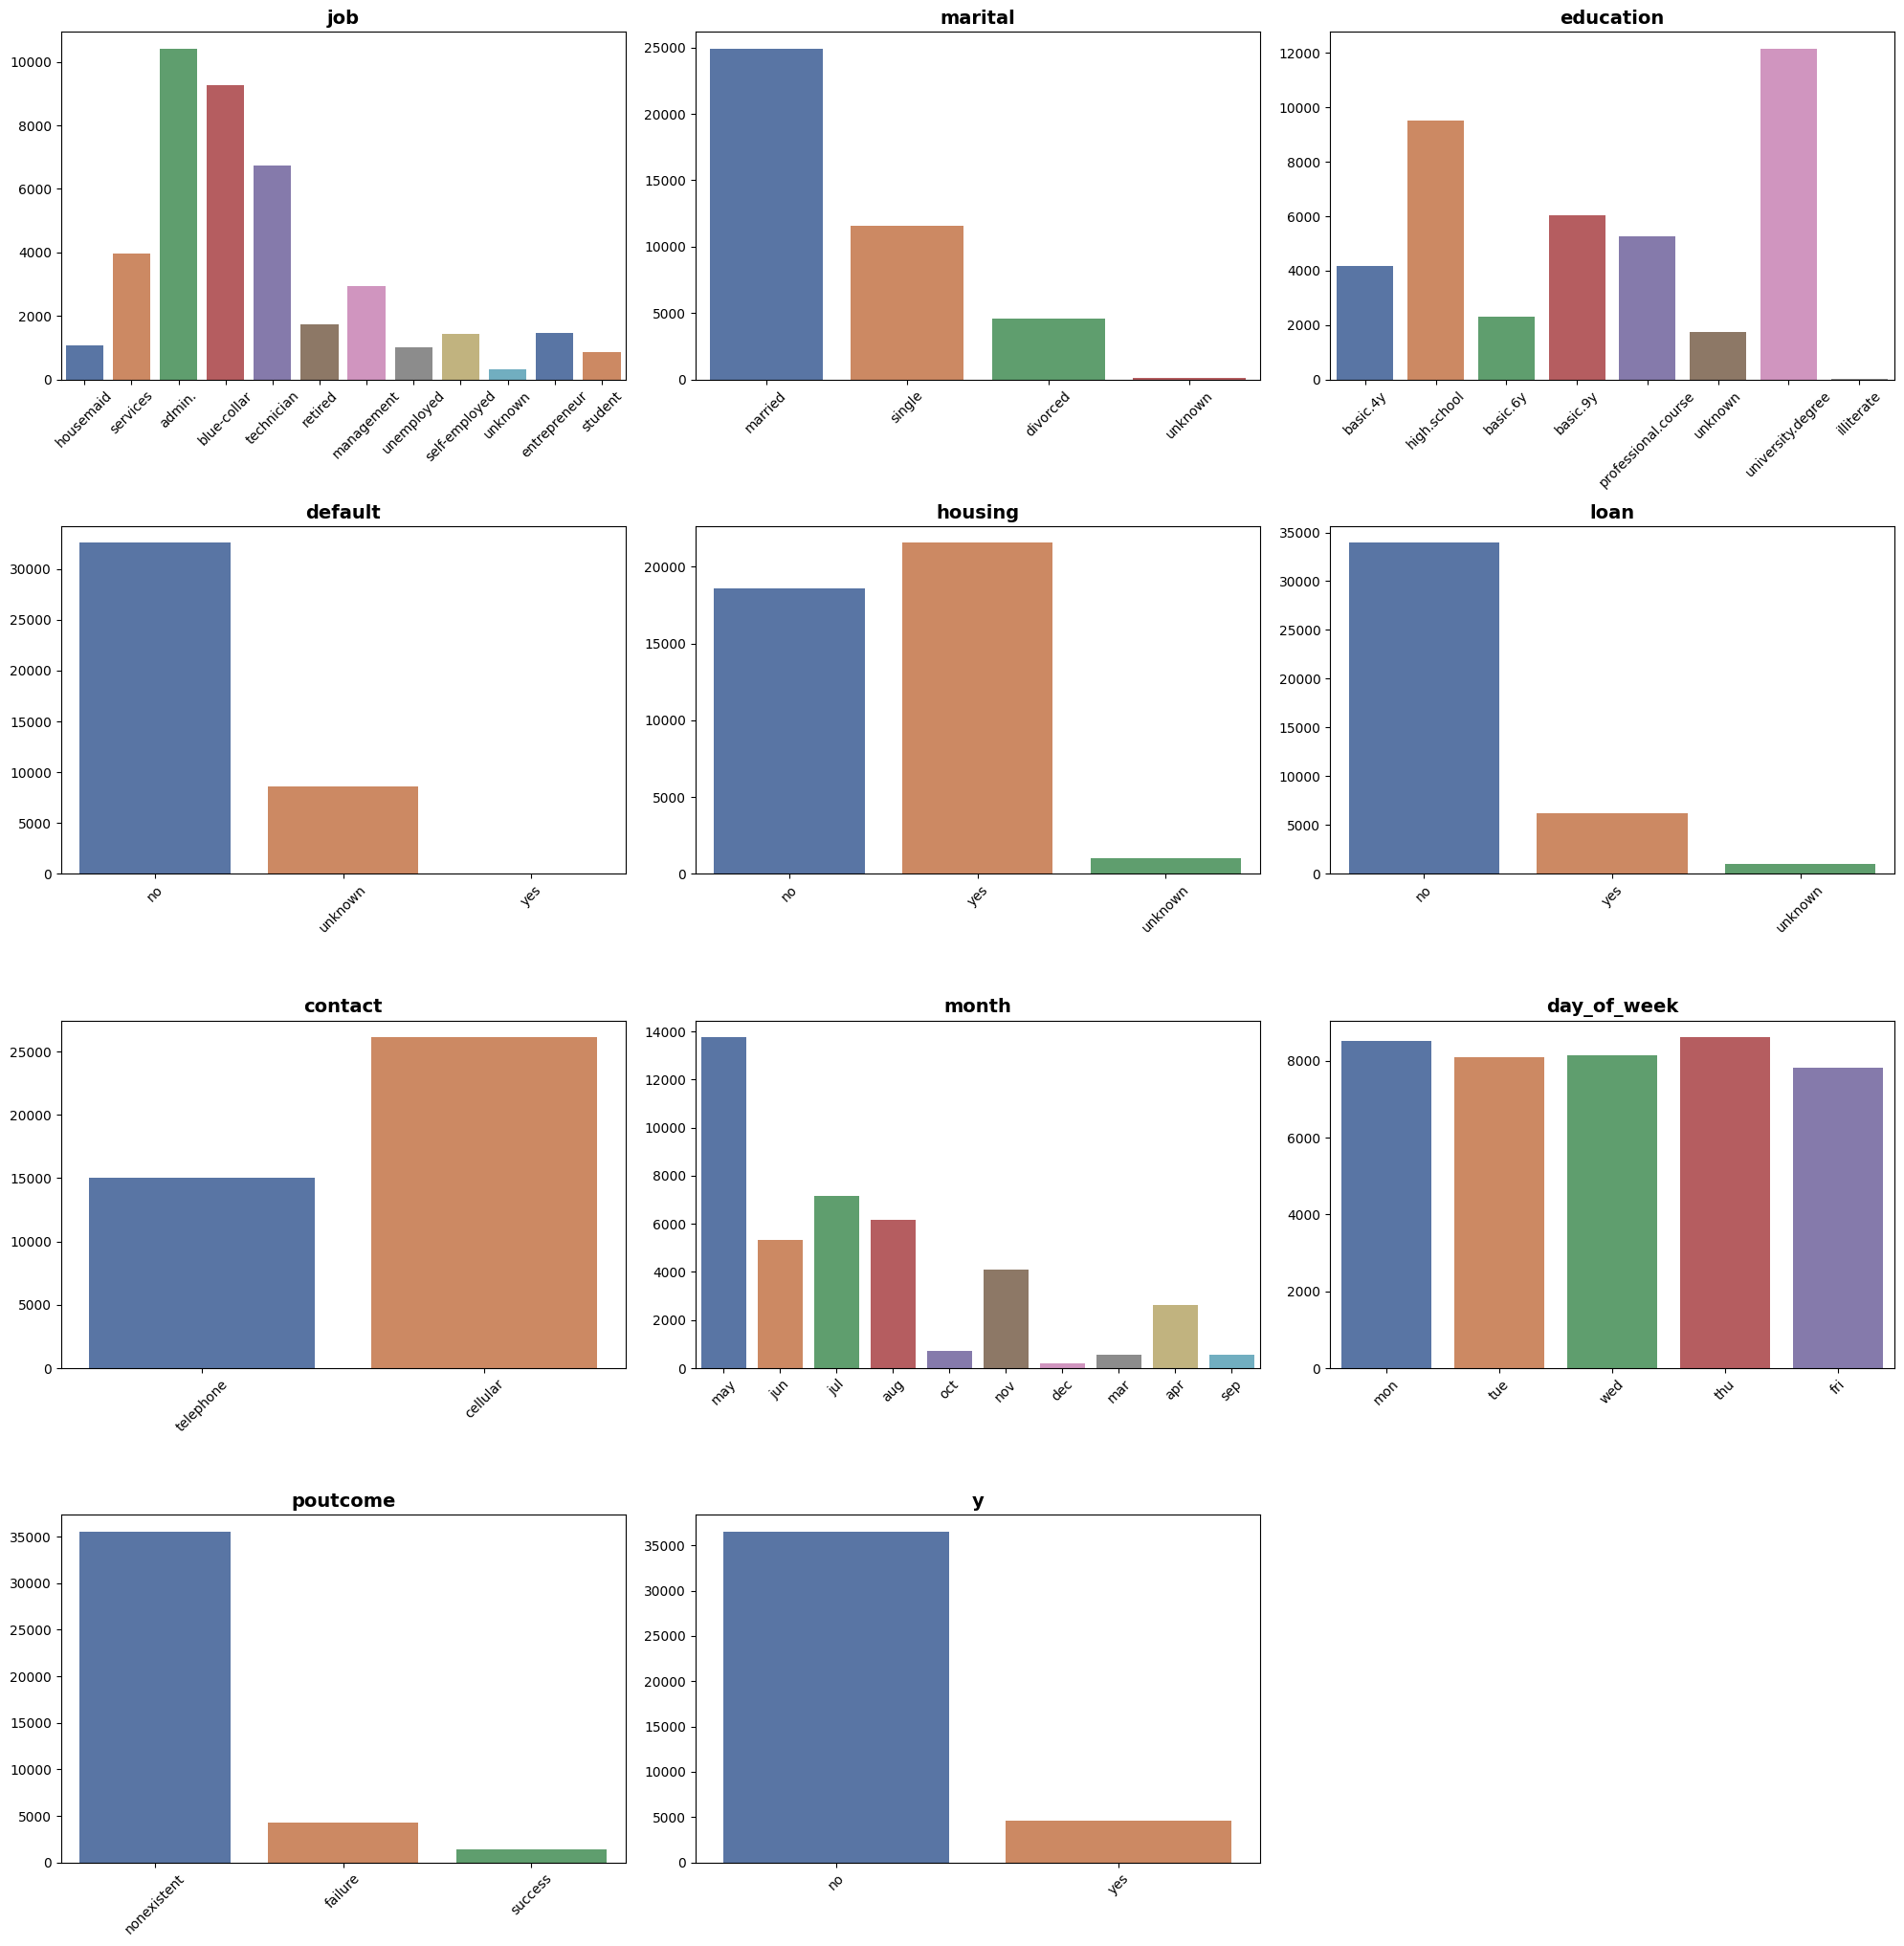

In [ ]:
plt.figure(figsize = (20,30))
for i, col in enumerate(non_numeric_cols,1):
  plt.subplot(6,3,i)
  sns.countplot(data= df,x = col,palette='deep',hue = col)
  plt.title(col, fontsize = 14, fontweight = 'bold')
  plt.xlabel(None)
  plt.ylabel(None)
  plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [ ]:
#xem bảng màu
print(sns.palettes.SEABORN_PALETTES)

{'deep': ['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3', '#937860', '#DA8BC3', '#8C8C8C', '#CCB974', '#64B5CD'], 'deep6': ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD'], 'muted': ['#4878D0', '#EE854A', '#6ACC64', '#D65F5F', '#956CB4', '#8C613C', '#DC7EC0', '#797979', '#D5BB67', '#82C6E2'], 'muted6': ['#4878D0', '#6ACC64', '#D65F5F', '#956CB4', '#D5BB67', '#82C6E2'], 'pastel': ['#A1C9F4', '#FFB482', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#DEBB9B', '#FAB0E4', '#CFCFCF', '#FFFEA3', '#B9F2F0'], 'pastel6': ['#A1C9F4', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#FFFEA3', '#B9F2F0'], 'bright': ['#023EFF', '#FF7C00', '#1AC938', '#E8000B', '#8B2BE2', '#9F4800', '#F14CC1', '#A3A3A3', '#FFC400', '#00D7FF'], 'bright6': ['#023EFF', '#1AC938', '#E8000B', '#8B2BE2', '#FFC400', '#00D7FF'], 'dark': ['#001C7F', '#B1400D', '#12711C', '#8C0800', '#591E71', '#592F0D', '#A23582', '#3C3C3C', '#B8850A', '#006374'], 'dark6': ['#001C7F', '#12711C', '#8C0800', '#591E71', '#B8850A', '#006374'], 'col

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

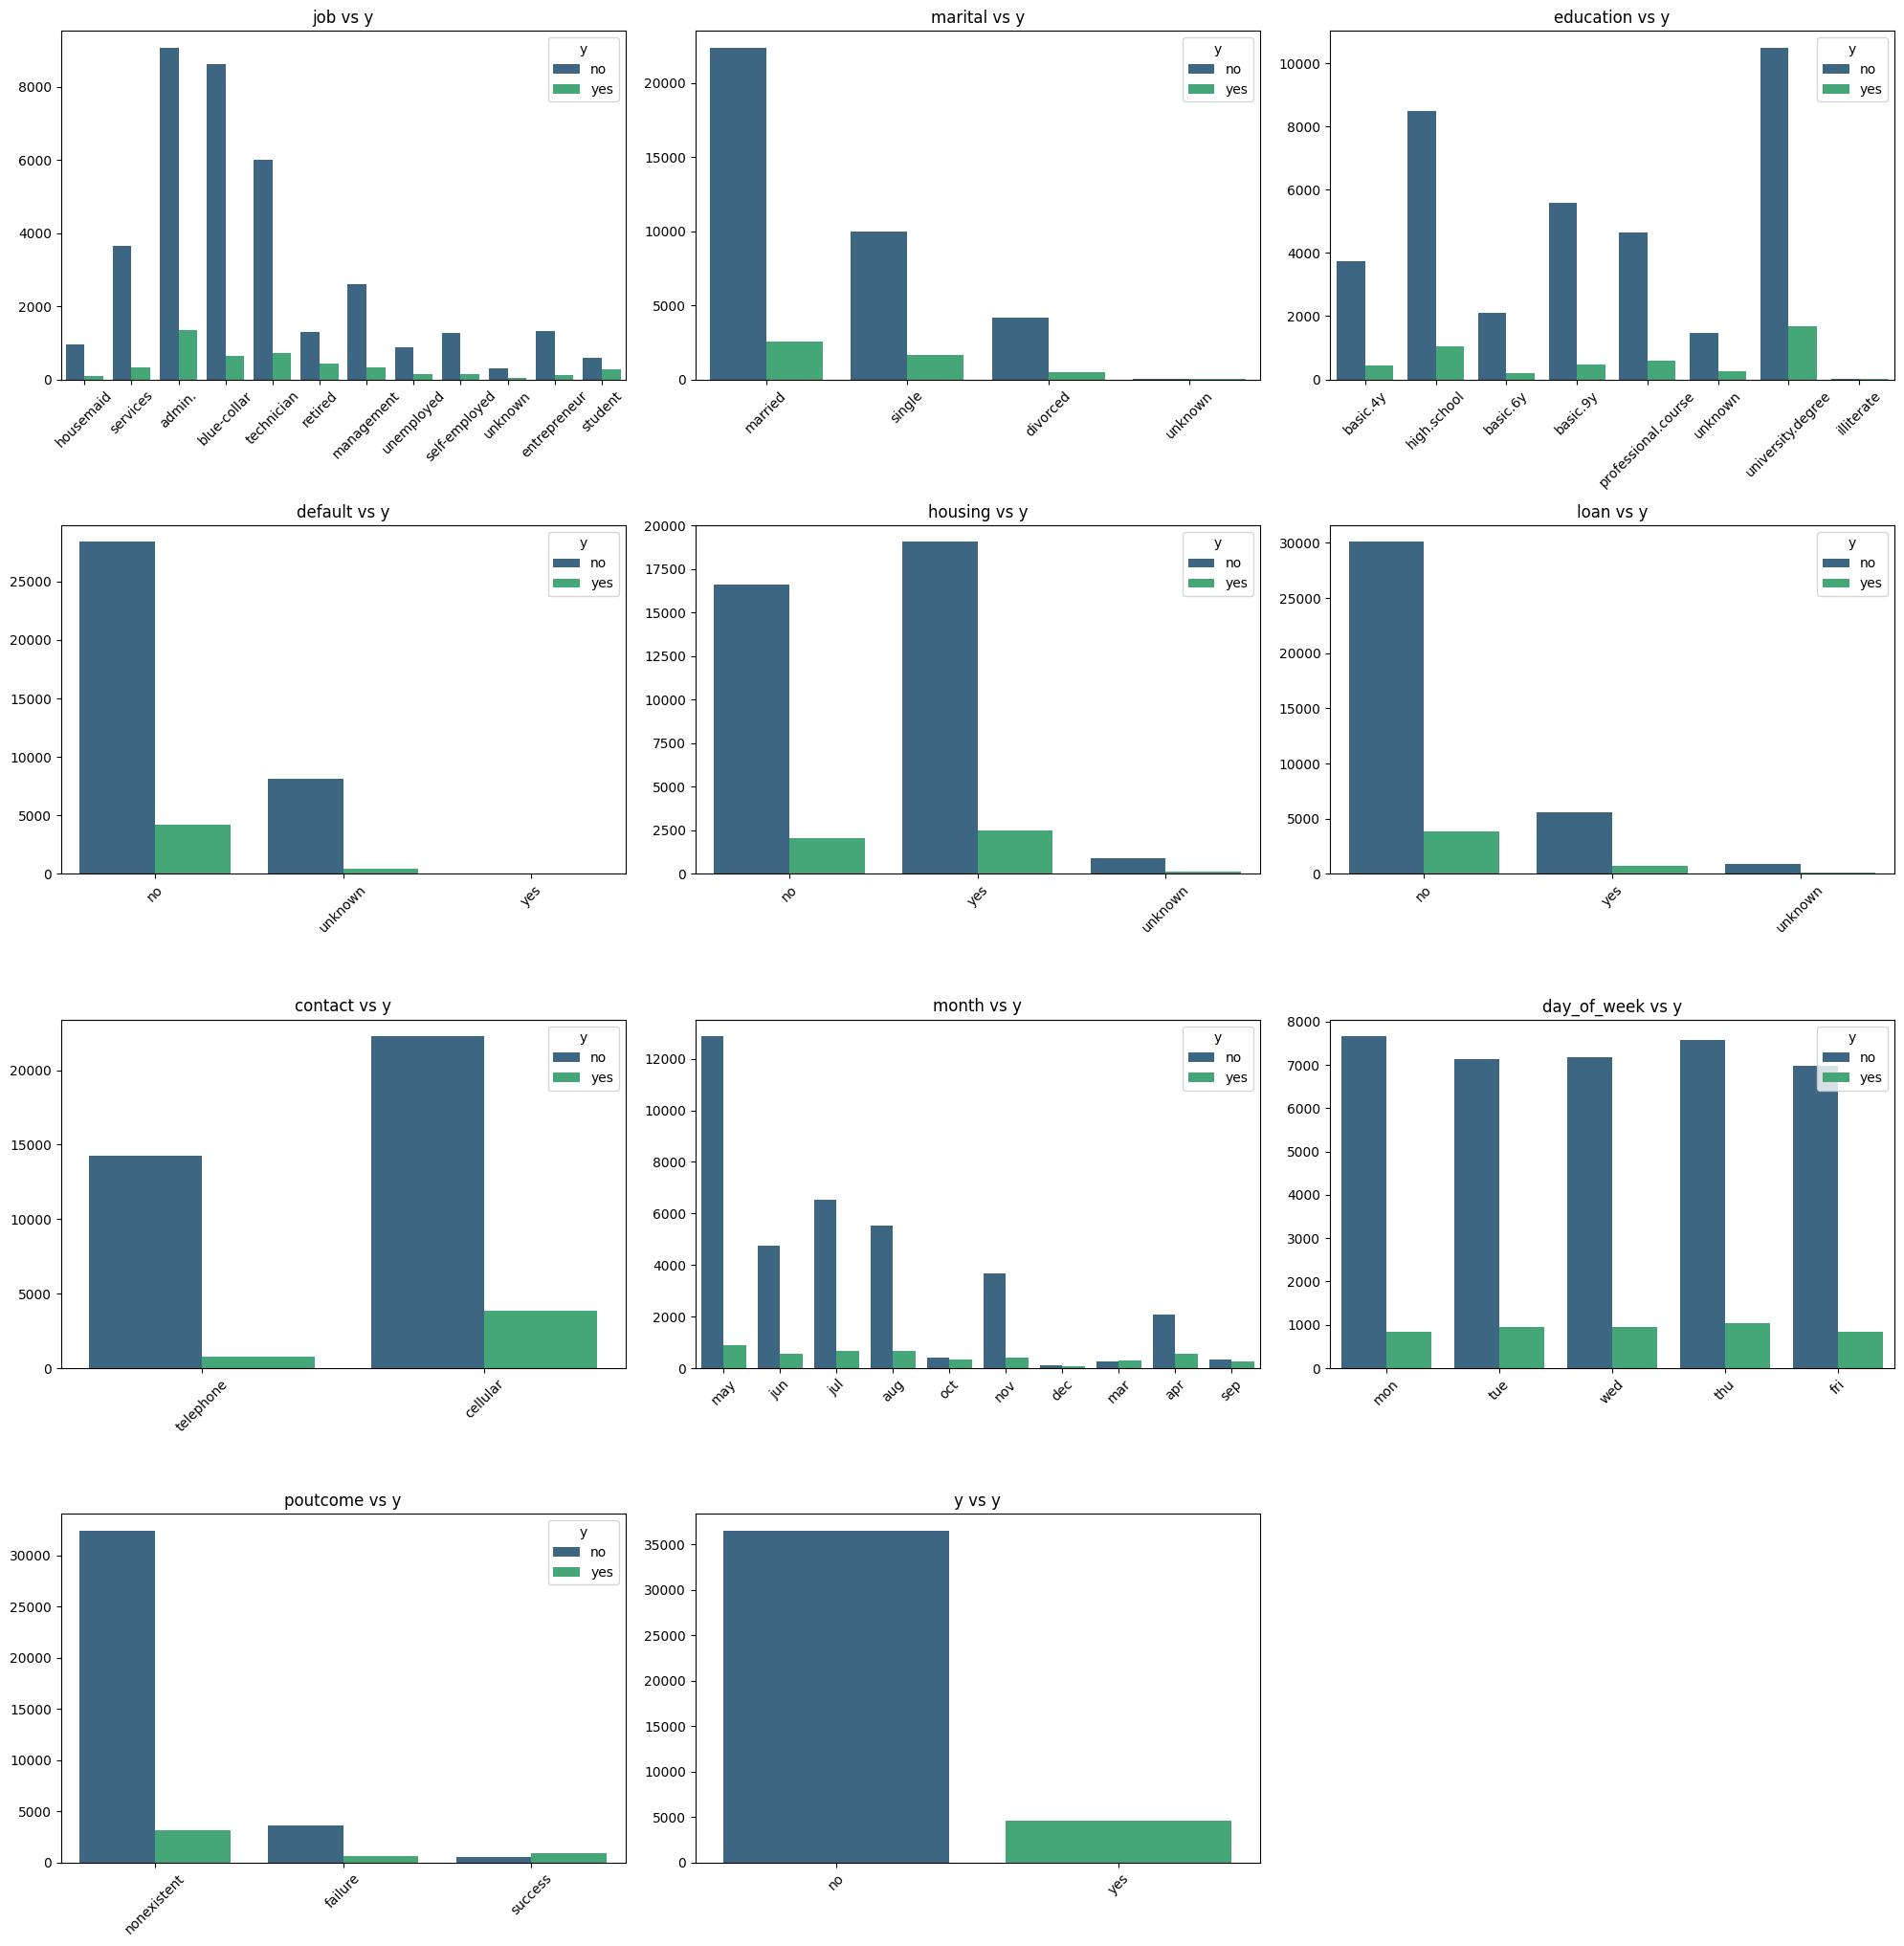

In [ ]:
plt.figure(figsize = (20,30))
for i, col in enumerate(non_numeric_cols,1):
  plt.subplot(6,3,i)
  sns.countplot(data = df, x = col, hue ='y',palette ='viridis')
  plt.title(f'{col} vs y')
  plt.xlabel(None)
  plt.ylabel(None)
  plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

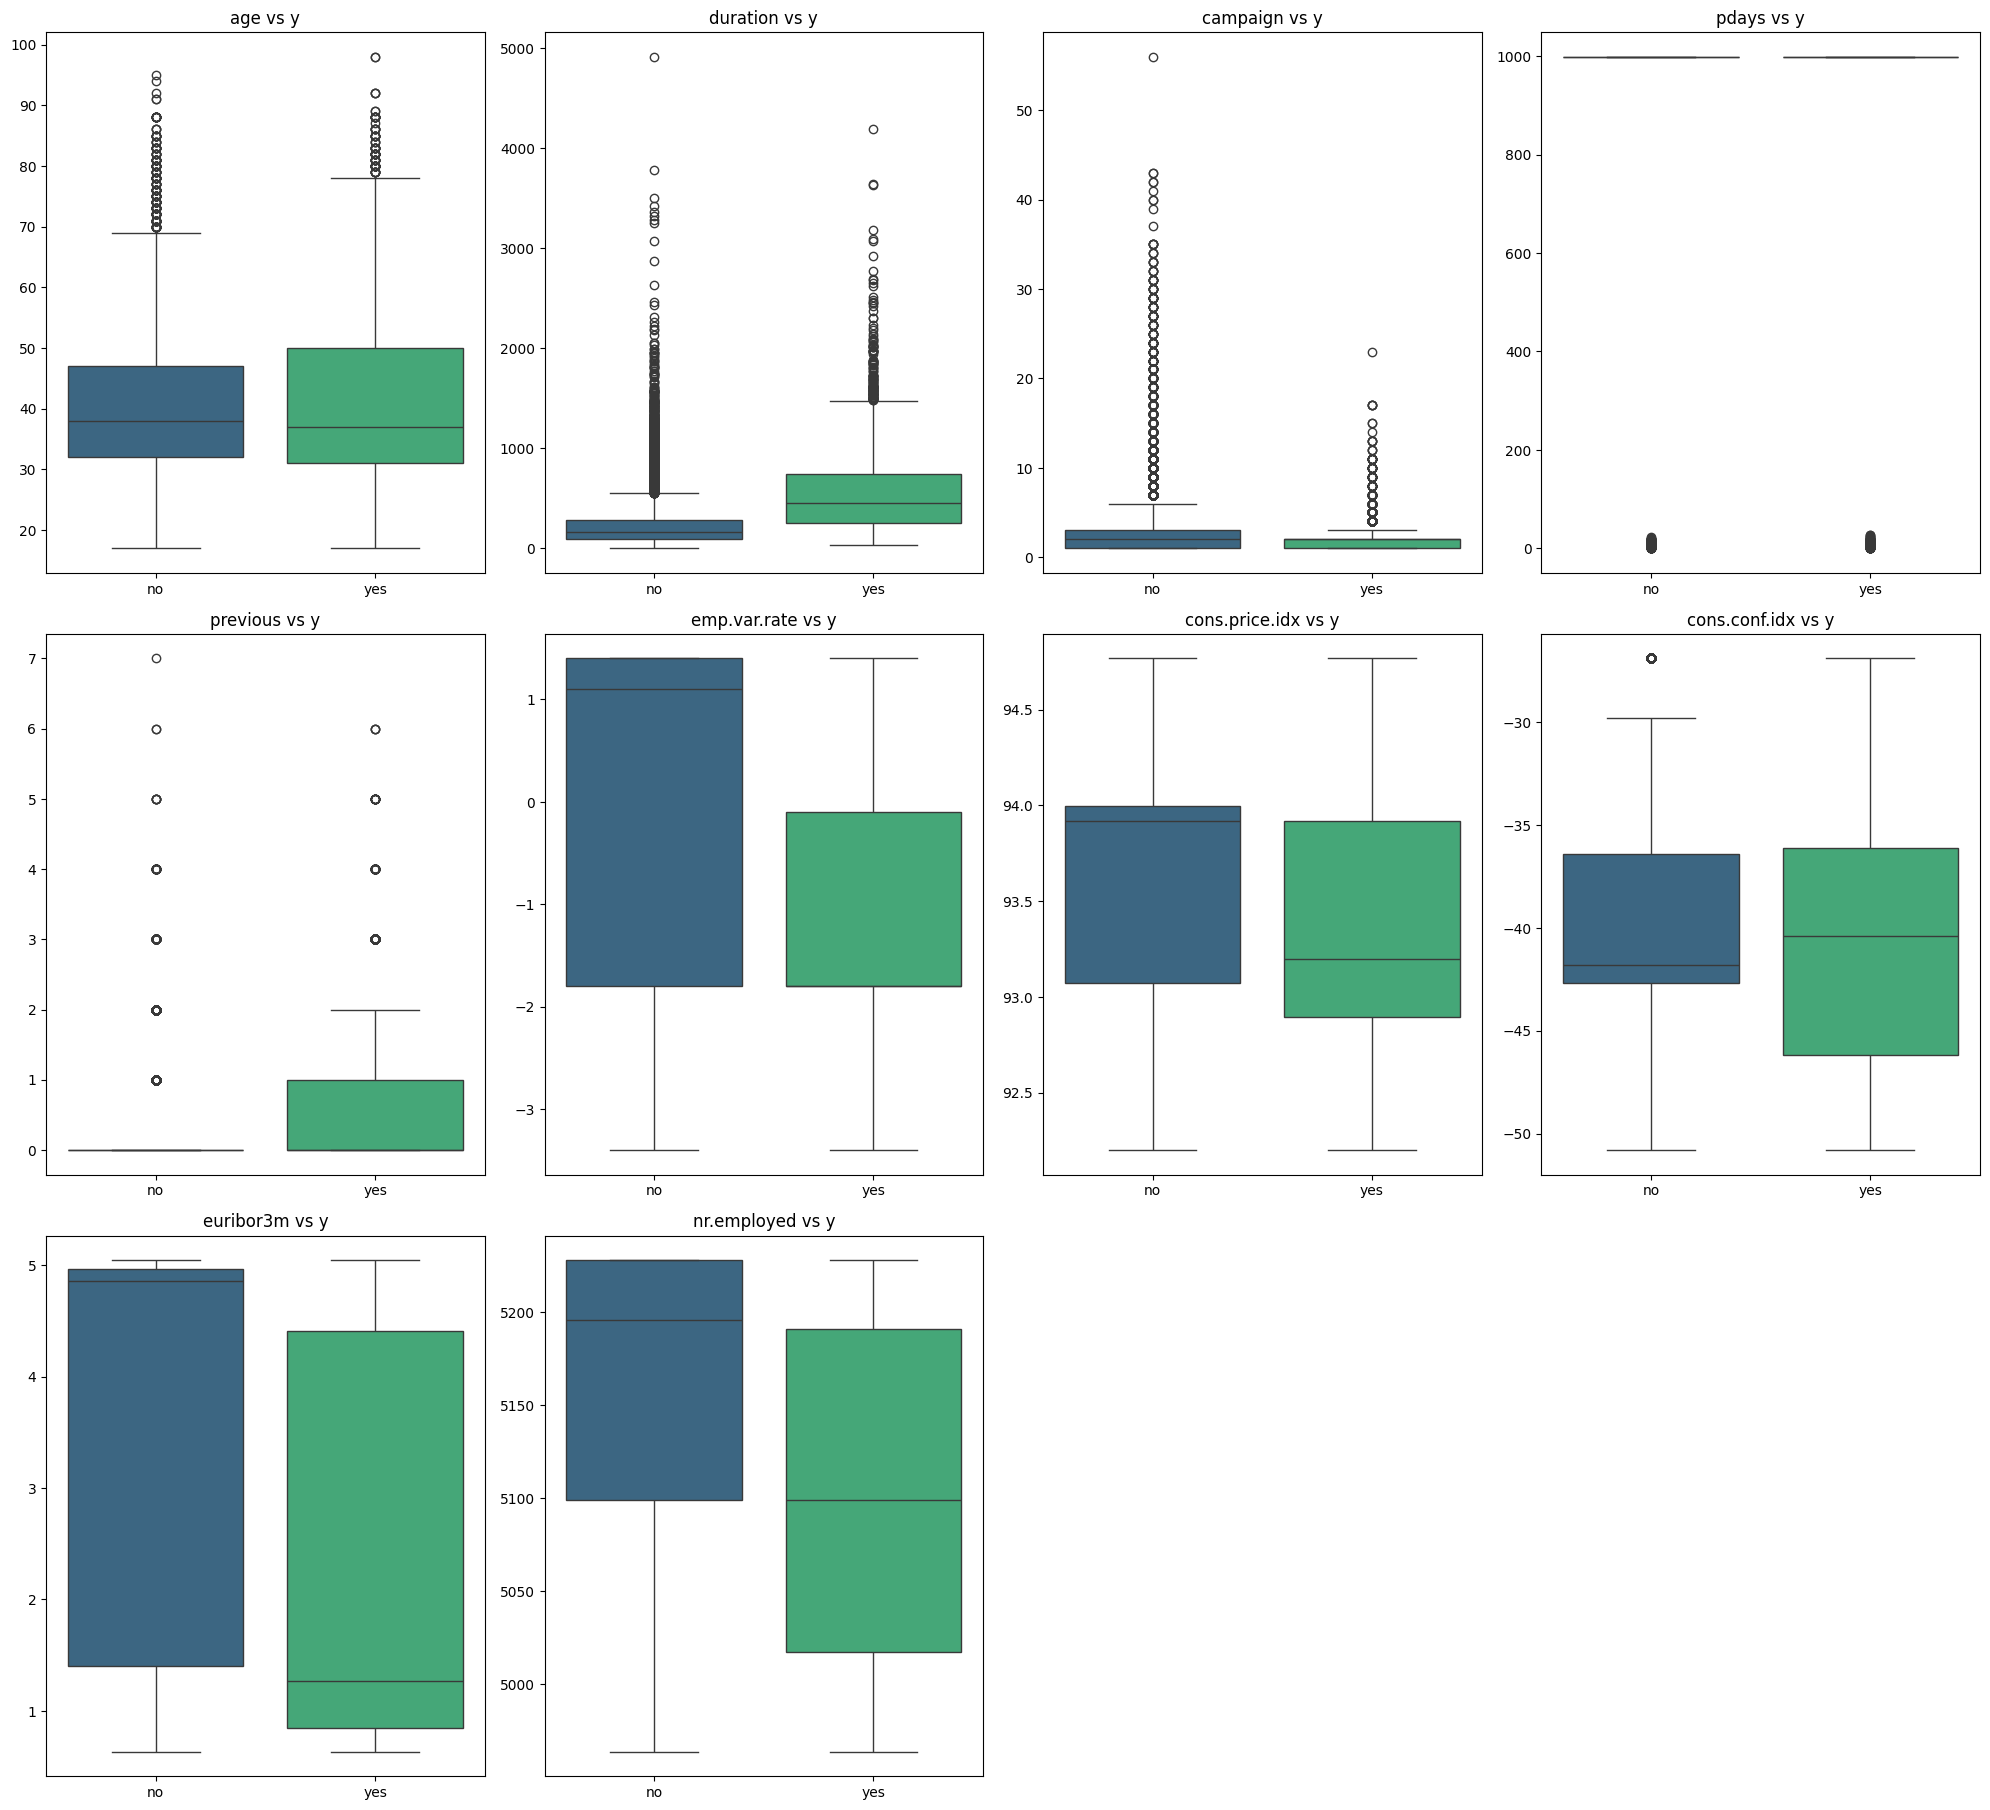

In [ ]:
plt.figure(figsize =(20,30))
for i, col in enumerate(numeric_cols, 1):
  plt.subplot(5,4,i)
  sns.boxplot(data = df, x = 'y', y = col, hue = 'y',palette = 'viridis')
  plt.title(f'{col} vs y')
  plt.xlabel(None)
  plt.ylabel(None)
plt.tight_layout()
plt.show()

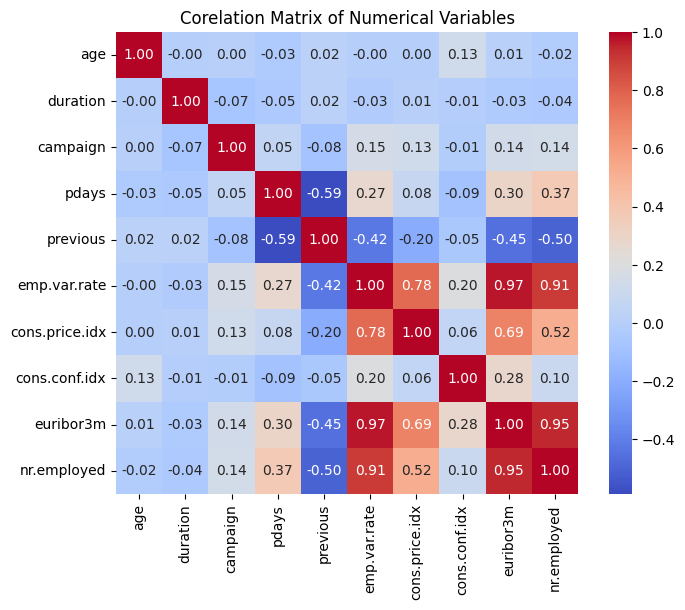

In [ ]:
#correlation
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix,annot = True, cmap = 'coolwarm',fmt = ".2f", square = True)
plt.title('Corelation Matrix of Numerical Variables')
plt.show()

In [ ]:
var_remove = ['contact', 'month','day_of_week','poutcome']
df_final = df.drop(var_remove, axis = 1)
df_final.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
df_final['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [ ]:
df_final = df_final[df_final['marital'] !='unknown']
df_final['marital'].value_counts()

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64

In [ ]:
df_final['housing'].value_counts()

yes        21541
no         18578
unknown      989
Name: housing, dtype: int64

In [ ]:
df_final = df_final[df_final['housing'] !='unknown']
df_final['housing'].value_counts()

yes    21541
no     18578
Name: housing, dtype: int64

In [ ]:
df_final['loan'].value_counts()

no     33883
yes     6236
Name: loan, dtype: int64

In [ ]:
df_final['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [ ]:
df_final['education'] = df_final['education'].replace(['basic.4y','basic.9y', 'basic.6y'],'basic.education')
df_final['education'].unique()

array(['basic.education', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [ ]:
df_final['education'].value_counts()

basic.education        12166
university.degree      11860
high.school             9281
professional.course     5112
unknown                 1682
illiterate                18
Name: education, dtype: int64

In [ ]:
df_final['age'].describe()

count    40119.000000
mean        40.025649
std         10.421783
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

In [ ]:
num_bins = 5
df_final['age_group'] = pd.cut(df_final['age'],bins = num_bins,labels = [ f'Group {i+1}' for i in range(num_bins)])
df_final['age_group'].value_counts()

Group 2    19635
Group 1    12649
Group 3     7230
Group 4      508
Group 5       97
Name: age_group, dtype: int64

In [ ]:
print('Age Group Boundaries:')
print('Min')
print(df_final.groupby('age_group')['age'].min())
print('Max')
print(df_final.groupby('age_group')['age'].max())

Age Group Boundaries:
Min
age_group
Group 1    17
Group 2    34
Group 3    50
Group 4    66
Group 5    82
Name: age, dtype: int64
Max
age_group
Group 1    33
Group 2    49
Group 3    65
Group 4    81
Group 5    98
Name: age, dtype: int64


In [ ]:
df_final = df_final.drop(columns = ['age'])
df_final.head()

,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,housemaid,married,basic.education,no,no,no,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,Group 3
1,services,married,high.school,unknown,no,no,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,Group 3
2,services,married,high.school,no,yes,no,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,Group 2
3,admin.,married,basic.education,no,no,no,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,Group 2
4,services,married,high.school,no,no,yes,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,Group 3


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40119 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   job             40119 non-null  object  
 1   marital         40119 non-null  object  
 2   education       40119 non-null  object  
 3   default         40119 non-null  object  
 4   housing         40119 non-null  object  
 5   loan            40119 non-null  object  
 6   duration        40119 non-null  int64   
 7   campaign        40119 non-null  int64   
 8   pdays           40119 non-null  int64   
 9   previous        40119 non-null  int64   
 10  emp.var.rate    40119 non-null  float64 
 11  cons.price.idx  40119 non-null  float64 
 12  cons.conf.idx   40119 non-null  float64 
 13  euribor3m       40119 non-null  float64 
 14  nr.employed     40119 non-null  float64 
 15  y               40119 non-null  object  
 16  age_group       40119 non-null  category
dtypes: category(

**Numerical Treatment**

In [ ]:
num_cols = df_final.select_dtypes(include=['int', 'float']).columns
scaler = StandardScaler()
df_final[num_cols] = scaler.fit_transform(df_final[num_cols])
df_final.head()


,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,housemaid,married,basic.education,no,no,no,0.010084,-0.566986,0.195436,-0.349162,0.648485,0.725917,0.887357,0.712711,0.331327,no,Group 3
1,services,married,high.school,unknown,no,no,-0.421805,-0.566986,0.195436,-0.349162,0.648485,0.725917,0.887357,0.712711,0.331327,no,Group 3
2,services,married,high.school,no,yes,no,-0.124881,-0.566986,0.195436,-0.349162,0.648485,0.725917,0.887357,0.712711,0.331327,no,Group 2
3,admin.,married,basic.education,no,no,no,-0.414093,-0.566986,0.195436,-0.349162,0.648485,0.725917,0.887357,0.712711,0.331327,no,Group 2
4,services,married,high.school,no,no,yes,0.187468,-0.566986,0.195436,-0.349162,0.648485,0.725917,0.887357,0.712711,0.331327,no,Group 3


**Categorical Treatment**

In [ ]:
cat_cols = df_final.select_dtypes(['object', 'category'])
label_encoder= LabelEncoder()
for col in cat_cols:
  df_final[col] =label_encoder.fit_transform(df_final[col])
df_final.head()

,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,3,1,0,0,0,0,0.010084,-0.566986,0.195436,-0.349162,0.648485,0.725917,0.887357,0.712711,0.331327,0,2
1,7,1,1,1,0,0,-0.421805,-0.566986,0.195436,-0.349162,0.648485,0.725917,0.887357,0.712711,0.331327,0,2
2,7,1,1,0,1,0,-0.124881,-0.566986,0.195436,-0.349162,0.648485,0.725917,0.887357,0.712711,0.331327,0,1
3,0,1,0,0,0,0,-0.414093,-0.566986,0.195436,-0.349162,0.648485,0.725917,0.887357,0.712711,0.331327,0,1
4,7,1,1,0,0,1,0.187468,-0.566986,0.195436,-0.349162,0.648485,0.725917,0.887357,0.712711,0.331327,0,2


#Model
**bold text**


In [ ]:
X = df_final.drop(columns = ['y'])
y = df_final['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42)
print("Training set shape: ", X_train.shape, y_train.shape)
print("Testing set shape: " ,X_test.shape,y_test.shape )

Training set shape:  (32095, 16) (32095,)
Testing set shape:  (8024, 16) (8024,)


##**--1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy :" , accuracy)

Accuracy : 0.9060319042871385


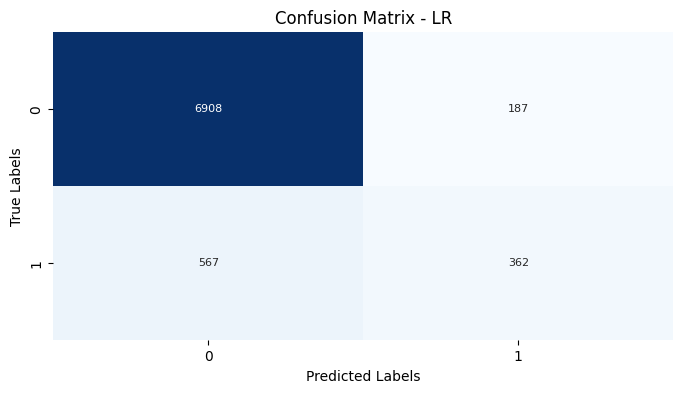

In [ ]:
# Confusion Matrix:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize =(8,4))
sns.heatmap(conf_matrix_lr, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, annot_kws = {"fontsize":8})
plt.title('Confusion Matrix - LR')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

##2.Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree :", accuracy_dt)

Accuracy of Decision Tree : 0.884097706879362


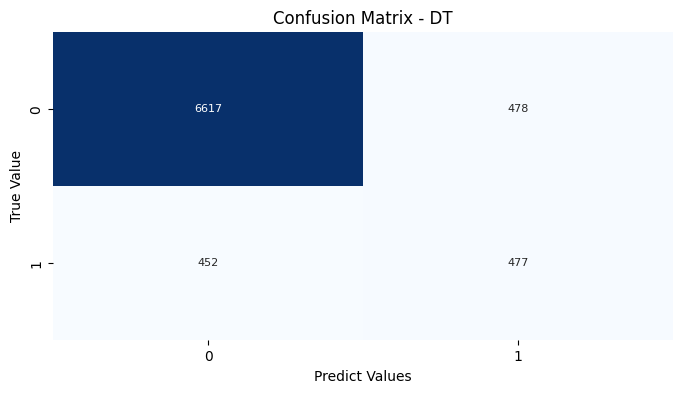

In [ ]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize = (8,4))
sns.heatmap(conf_matrix_dt, cmap = 'Blues', annot = True, fmt = 'd' , cbar = False, annot_kws ={"fontsize":8})
'''Vẽ biểu đồ heatmap của ma trận nhầm lẫn, trong đó các ô sẽ được hiển thị giá trị và màu sắc dựa trên giá trị của ô.
 Các giá trị trong ô sẽ được hiển thị (annot=True) với định dạng số nguyên (fmt='d'),
 sử dụng màu sắc 'Blues' cho heatmap, không hiển thị colorbar (cbar=False), và thiết lập kích thước chữ cho giá trị là 8.'''
plt.title("Confusion Matrix - DT")
plt.xlabel("Predict Values")
plt.ylabel('True Value')
plt.show()

## **3 .- Random Forest-**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier  = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of RF:", accuracy_rf)

Accuracy of RF: 0.9076520438683948


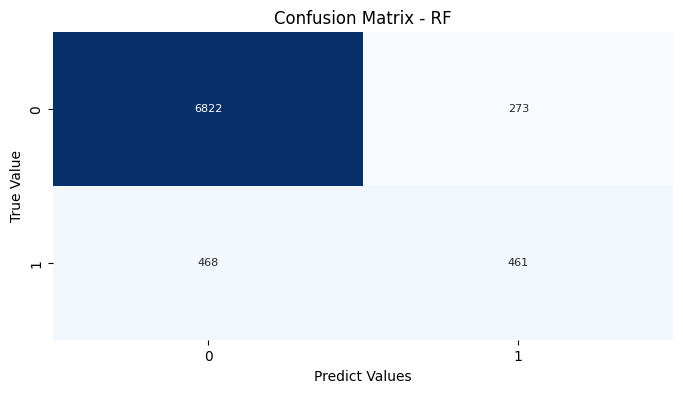

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize = (8,4))
sns.heatmap(conf_matrix_rf, cmap = 'Blues', annot = True, fmt = 'd' , cbar = False, annot_kws ={"fontsize":8})
plt.title("Confusion Matrix - RF")
plt.xlabel("Predict Values")
plt.ylabel('True Value')
plt.show()